# Basemap

Basemap is now depricated and will not be supported anymore.

- [Website](http://matplotlib.org/basemap/)
- [Users Guide](http://matplotlib.org/basemap/users/index.html)

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import pandas as pd
#plt.rcParams['figure.figsize'] = 7, 8

In [2]:
x1 = -20.
x2 = 40.
y1 = 32.
y2 = 64.
 
m = Basemap(resolution='l',projection='merc',\
            llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,\
            urcrnrlon=x2,lat_ts=(x1+x2)/2)

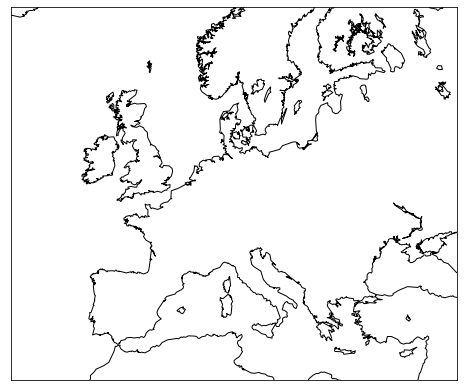

In [3]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1.0);

In [4]:
lat = 53.565278
lon = 10.001389

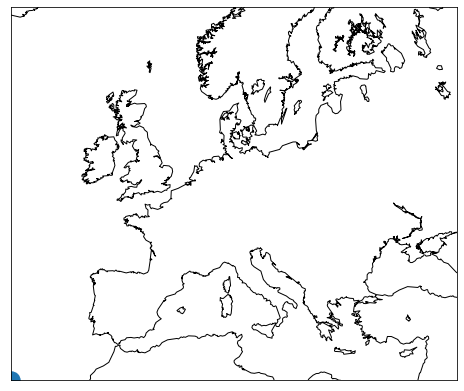

In [5]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1.0);
m.scatter(lon,lat,300)

In [6]:
print(' xmin {}\n xmax {}\n ymin {}\n ymax {}'.format(str(m.xmin),str(m.xmax),str(m.ymin),str(m.ymax)))

 xmin 0.0
 xmax 6570334.45744631
 ymin 0.0
 ymax 5495424.022817817


In [7]:
x,y = m(lon,lat)

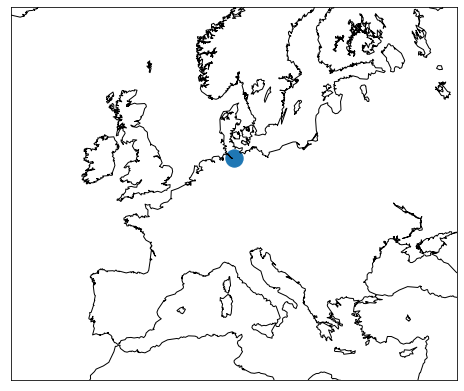

In [8]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1.0);
m.scatter(x,y,300)

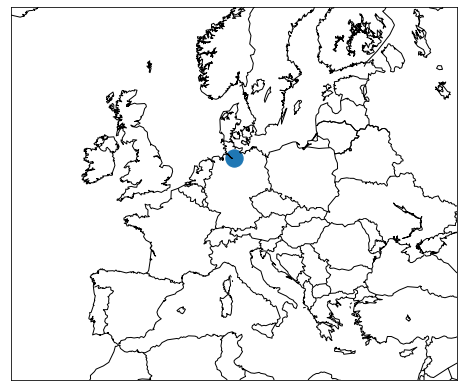

In [9]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.scatter(x,y,300)

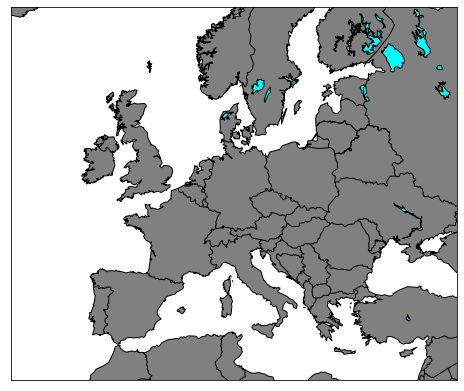

In [10]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='gray',lake_color='aqua')
m.scatter(x,y,300)


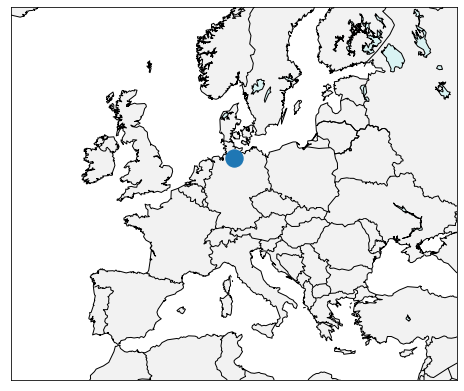

In [11]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='gray',lake_color='aqua',alpha=0.1)
m.scatter(x,y,300,zorder=10);

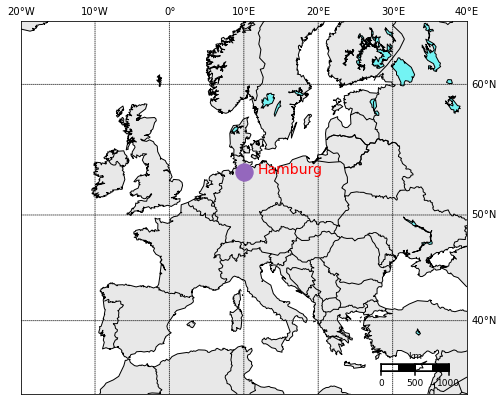

In [12]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',lake_color='aqua',alpha=0.5)
m.drawmeridians(np.arange(0,360,10),labels=[False,True,True,False])
m.drawparallels(np.arange(-90,90,10),labels=[False,True,True,False])
m.drawmapscale(33,35,0,40,1000,barstyle='fancy')
m.scatter(x,y,300,zorder=10)
plt.text(x+200000,y-20000,"Hamburg",color='red',size=14);

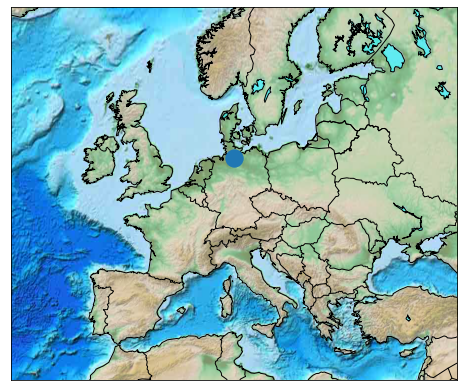

In [13]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',lake_color='aqua',alpha=0.5)
m.etopo()
m.scatter(x,y,300,zorder=10)

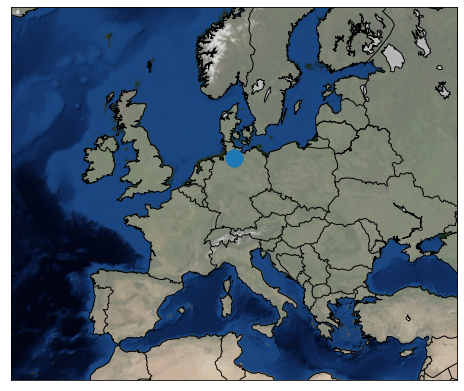

In [14]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',alpha=0.5)
m.bluemarble()
m.scatter(x,y,300,zorder=10)

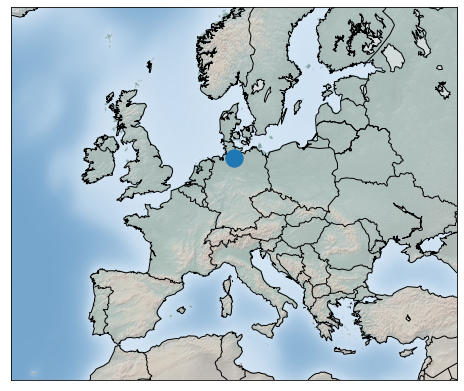

In [15]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',alpha=0.5)
m.shadedrelief()
m.scatter(x,y,300,zorder=10)

In [16]:
#!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc

## Put some data on the map

In order to create a map we have to first import some data. We are going to use NCEP reanalysis file from previous section:

In [17]:
from netCDF4 import Dataset

Here we create netCDF variable object for *air* (we would like to have acces to some of the attributes), but from *lat* and *lon* we import only data valies:

In [18]:
fl = Dataset('./air.2m.gauss.2016.nc')
air = fl.variables['air'][0,:,:]
lat = fl.variables['lat'][:]
lon = fl.variables['lon'][:]

Easiest way to look at the array is imshow:

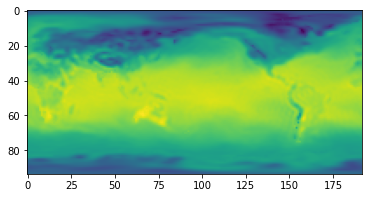

In [19]:
plt.imshow(air)

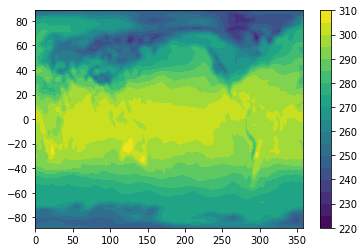

In [20]:
plt.contourf(lon,lat,air,20)
plt.colorbar();

In [21]:
lon.shape

(192,)

For the map we need 2d coordinate arrays. Convert lot lan to 2d:

In [22]:
lon2, lat2 = np.meshgrid(lon,lat)

In [23]:
lon2.shape

(94, 192)

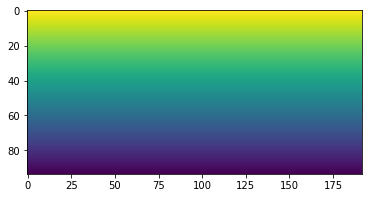

In [24]:
plt.imshow(lat2)

Create Basemap instance (with certain characteristics) and convert lon lat to map coordinates

In [25]:
m = Basemap(projection='ortho',lat_0=45,lon_0=0,resolution='l')
x, y = m(lon2, lat2)

Creating the map now is only two lines:

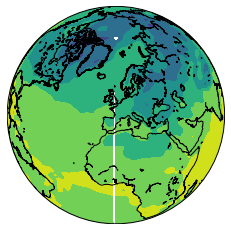

In [26]:
m.drawcoastlines()
m.contourf(x,y,air)

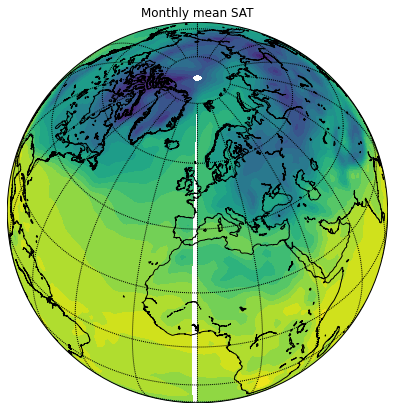

In [27]:
fig = plt.figure(figsize=(15,7))
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
cs = m.contourf(x,y,air,20)
plt.title('Monthly mean SAT');

In [28]:
lon

masked_array(data=[  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,
                    11.25 ,  13.125,  15.   ,  16.875,  18.75 ,  20.625,
                    22.5  ,  24.375,  26.25 ,  28.125,  30.   ,  31.875,
                    33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
                    45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,
                    56.25 ,  58.125,  60.   ,  61.875,  63.75 ,  65.625,
                    67.5  ,  69.375,  71.25 ,  73.125,  75.   ,  76.875,
                    78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
                    90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375,
                   101.25 , 103.125, 105.   , 106.875, 108.75 , 110.625,
                   112.5  , 114.375, 116.25 , 118.125, 120.   , 121.875,
                   123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
                   135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375,
                   146.25 , 148.125, 150.   , 151.8

In [29]:
from mpl_toolkits.basemap import addcyclic

In [30]:
air_cyc, lon_cyc = addcyclic(air, lon)

/Users/koldunovn/miniconda3/envs/course/lib/python3.7/site-packages/numpy/ma/core.py:3188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


In [31]:
lon_cyc

masked_array(data=[  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,
                    11.25 ,  13.125,  15.   ,  16.875,  18.75 ,  20.625,
                    22.5  ,  24.375,  26.25 ,  28.125,  30.   ,  31.875,
                    33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
                    45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,
                    56.25 ,  58.125,  60.   ,  61.875,  63.75 ,  65.625,
                    67.5  ,  69.375,  71.25 ,  73.125,  75.   ,  76.875,
                    78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
                    90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375,
                   101.25 , 103.125, 105.   , 106.875, 108.75 , 110.625,
                   112.5  , 114.375, 116.25 , 118.125, 120.   , 121.875,
                   123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
                   135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375,
                   146.25 , 148.125, 150.   , 151.8

In [32]:
lon2, lat2 = np.meshgrid(lon_cyc,lat)

In [33]:
m = Basemap(projection='ortho',lat_0=45,lon_0=0,resolution='l')
x, y = m(lon2, lat2)

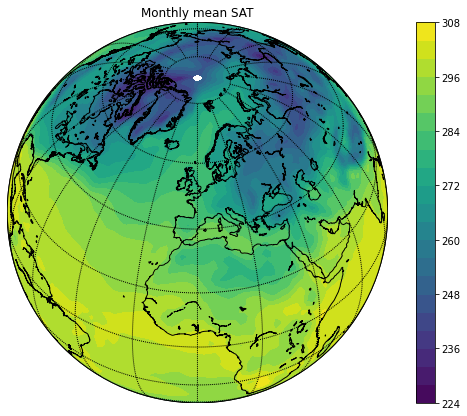

In [34]:
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar();

In [35]:
air_cyc.shape

(94, 193)

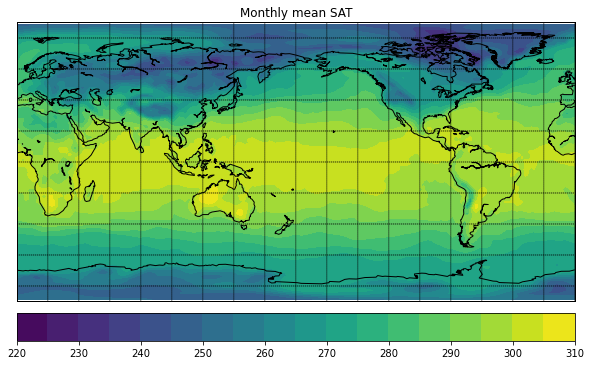

In [36]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar(orientation='horizontal', pad = 0.03);

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

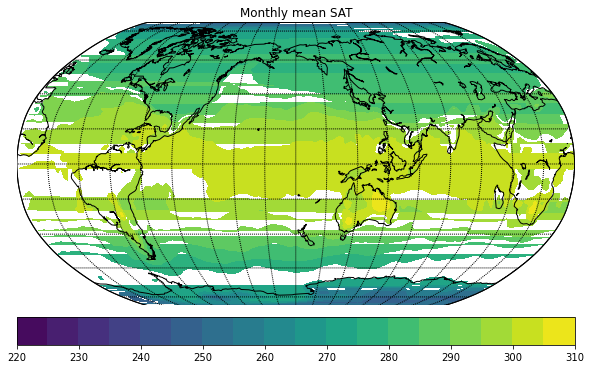

In [37]:
m = Basemap(projection='robin',lon_0=180,resolution='c')
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar(orientation='horizontal', pad = 0.03);

## Links

* [Basemap Example Gallery](http://matplotlib.org/basemap/users/examples.html)
* [PyNGL Gallery](http://www.pyngl.ucar.edu/Examples/gallery.shtml)
* [ggplot for python](http://blog.yhathq.com/posts/ggplot-for-python.html)
* [Bokeh](https://github.com/ContinuumIO/Bokeh)
* [d3py](https://github.com/mikedewar/d3py)

## Exersise

- download woa13 5 degree climatology ( https://data.nodc.noaa.gov/thredds/fileServer/woa/WOA13/DATAv2/temperature/netcdf/decav/5deg/woa13_decav_t00_5dv2.nc )
- extract data and plot map of SST. You might want (BUT DON'T HAVE TO!!!) use shiftgrid, that can be imported as:

      from mpl_toolkits.basemap import shiftgrid
      
- Adjust your map (e.g change colormap, change progection, zoom to some region, fill continents). Use examples from [Example Gallery](https://matplotlib.org/basemap/users/examples.html)
